# 1. Find a topic & dataset

[Link](https://www.kaggle.com/datasets/madhavmalhotra/journal-entries-with-labelled-emotions?resource=download) to dataset


The data includes qualitative data of around 1,500 journal entries then quantative data for if there were certain emotional sentiments expressed in the journal entry. We will treat true false as binary entries.


My objectives are to analyze emotional inferences in the journal entries and see of there are patterns in certain emotional expressions.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("madhavmalhotra/journal-entries-with-labelled-emotions")

print("Path to dataset files:", path)
'''
# Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')
'''
# Importing necessary libraries for data manipulation, numerical operations, and plotting
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For plotting graphs

Using Colab cache for faster access to the 'journal-entries-with-labelled-emotions' dataset.
Path to dataset files: /kaggle/input/journal-entries-with-labelled-emotions


In [ ]:
import os

# List files in the downloaded directory
file_list = os.listdir(path)
print("Files in the dataset directory:", file_list)

# Assuming the CSV file is named 'journal_entries.csv', update the path
csv_file_path = os.path.join(path, 'data.csv')

# Check if the file exists before reading
if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print("\nDataFrame loaded successfully:")
    display(df.head())
else:
    print(f"\nError: The expected CSV file '{csv_file_path}' was not found in the directory.")
    print("Please check the file list above and update the 'csv_file_path' variable accordingly.")

Files in the dataset directory: ['.nfs000000003463ad0b0000002d', 'data.csv']

DataFrame loaded successfully:


,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,...,Answer.t1.family.raw,Answer.t1.food.raw,Answer.t1.friends.raw,Answer.t1.god.raw,Answer.t1.health.raw,Answer.t1.love.raw,Answer.t1.recreation.raw,Answer.t1.school.raw,Answer.t1.sleep.raw,Answer.t1.work.raw
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,"Yesterday, I visited my parents and had dinner...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,"Yesterday, I really felt the importance of my ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


# 2. Clean, Organize & Explore

Problem 2.1 Cleaning data - rename column names and convert to binary

In [ ]:
# Rename columns to just the emotions or event
new_columns = {}
for col in df.columns:
    if col != 'Answer':
        parts = col.split('.')
        if len(parts) > 2:
            new_columns[col] = parts[2].capitalize()
        else:
            new_columns[col] = col # Keep original name if it doesn't fit the pattern

df.rename(columns=new_columns, inplace=True)

In [ ]:
# Convert boolean columns to binary (0 or 1)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

display(df.head())

,Answer,Afraid,Angry,Anxious,Ashamed,Awkward,Bored,Calm,Confused,Disgusted,...,Family,Food,Friends,God,Health,Love,Recreation,School,Sleep,Work
0,"My family was the most salient part of my day,...",0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Yoga keeps me focused. I am able to take some ...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Yesterday, my family and I played a bunch of b...",0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"Yesterday, I visited my parents and had dinner...",0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"Yesterday, I really felt the importance of my ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Problem 2.2 - Prevalence Tables

In [ ]:
# Calculate frequency counts for each emotion (excluding 'Answer' column)
emotion_columns = df.columns.drop('Answer')
emotion_counts = df[emotion_columns].sum()

# Sort the emotion counts in descending order
ranked_emotions = emotion_counts.sort_values(ascending=False)

# Display the ranked emotions
print("Emotions ranked from most to least frequent:")
display(ranked_emotions.to_frame(name='Count'))

Emotions ranked from most to least frequent:


,Count
Happy,730
Satisfied,591
Calm,368
Proud,337
Family,275
Excited,251
Work,235
Food,203
Exercise,185
Frustrated,141


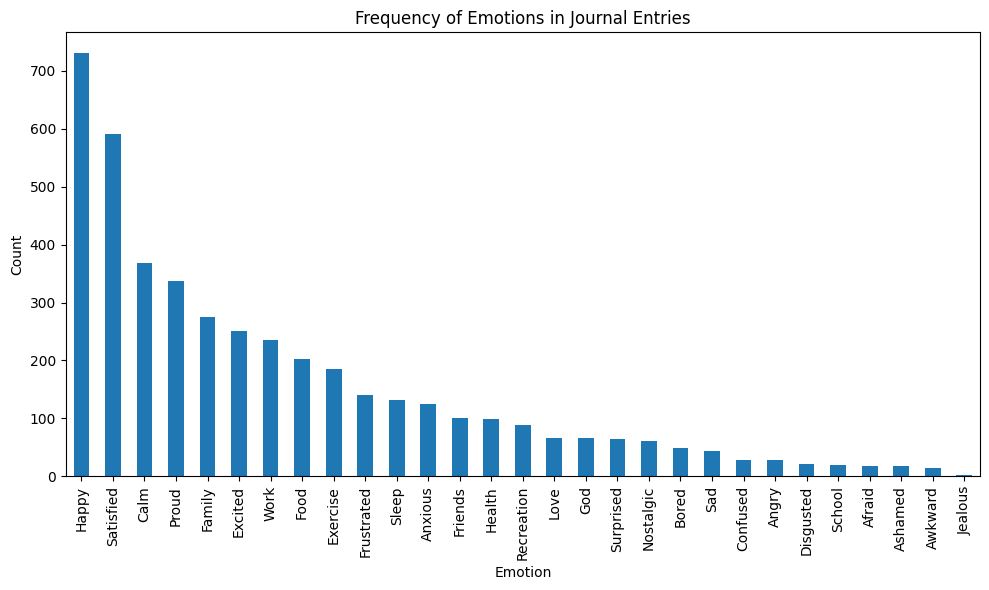

In [ ]:
# Create a bar chart of ranked emotion counts
plt.figure(figsize=(10, 6))
ranked_emotions.plot(kind='bar')
plt.title('Frequency of Emotions in Journal Entries')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

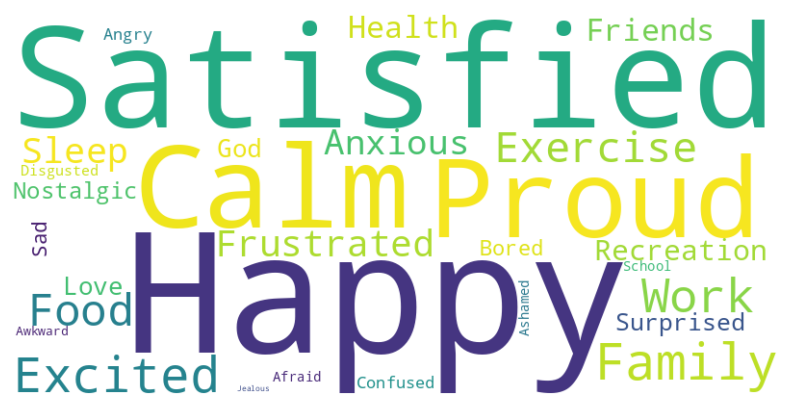

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud

# Generate a word cloud from the emotion frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(emotion_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Graph 3: Finding patterns in word occurances

Analyze and visualize the most frequent co-occurring emotional pairs in the dataset.

Determine how many times each pair of emotions appears in the same journal entry.


In [ ]:
emotion_cols = [col for col in df.columns if col != 'Answer']
co_occurrence_matrix = pd.DataFrame(0, index=emotion_cols, columns=emotion_cols)

for index, row in df.iterrows():
    present_emotions = [col for col in emotion_cols if row[col] == 1]
    for i in range(len(present_emotions)):
        for j in range(i + 1, len(present_emotions)):
            emotion1 = present_emotions[i]
            emotion2 = present_emotions[j]
            co_occurrence_matrix.loc[emotion1, emotion2] += 1
            co_occurrence_matrix.loc[emotion2, emotion1] += 1

#display(co_occurrence_matrix.head())

In [ ]:
# Create a list to store co-occurring emotion pairs and their counts
co_occurring_pairs = []

# Iterate through the co_occurrence_matrix to extract unique pairs and their counts
for i in range(len(co_occurrence_matrix.index)):
    for j in range(i + 1, len(co_occurrence_matrix.columns)):
        emotion1 = co_occurrence_matrix.index[i]
        emotion2 = co_occurrence_matrix.columns[j]
        count = co_occurrence_matrix.iloc[i, j]
        if count > 0: # Only include pairs that actually co-occur
            co_occurring_pairs.append(((emotion1, emotion2), count))

# Sort the list of pairs based on their co-occurrence counts in descending order
co_occurring_pairs.sort(key=lambda item: item[1], reverse=True)

# Select the top N most frequent emotional pairs (e.g., top 20)
N = 20
top_n_pairs = co_occurring_pairs[:N]

# Store the top N pairs and their counts in a new DataFrame
top_n_df = pd.DataFrame(top_n_pairs, columns=['Emotion Pair', 'Co-occurrence Count'])

# Display the DataFrame containing the top N most frequent emotional pairs
#print(f"Top {N} most frequent co-occurring emotional pairs:")
#display(top_n_df)

Structure the data of the most frequent pairs in a suitable format for plotting.


In [ ]:
# Create a new DataFrame for plotting
plot_df = top_n_df.copy()

# Extract individual emotions from the 'Emotion Pair' tuple
plot_df['Emotion 1'] = plot_df['Emotion Pair'].apply(lambda x: x[0])
plot_df['Emotion 2'] = plot_df['Emotion Pair'].apply(lambda x: x[1])

# Drop the original 'Emotion Pair' column as it's no longer needed for plotting
plot_df = plot_df[['Emotion 1', 'Emotion 2', 'Co-occurrence Count']]

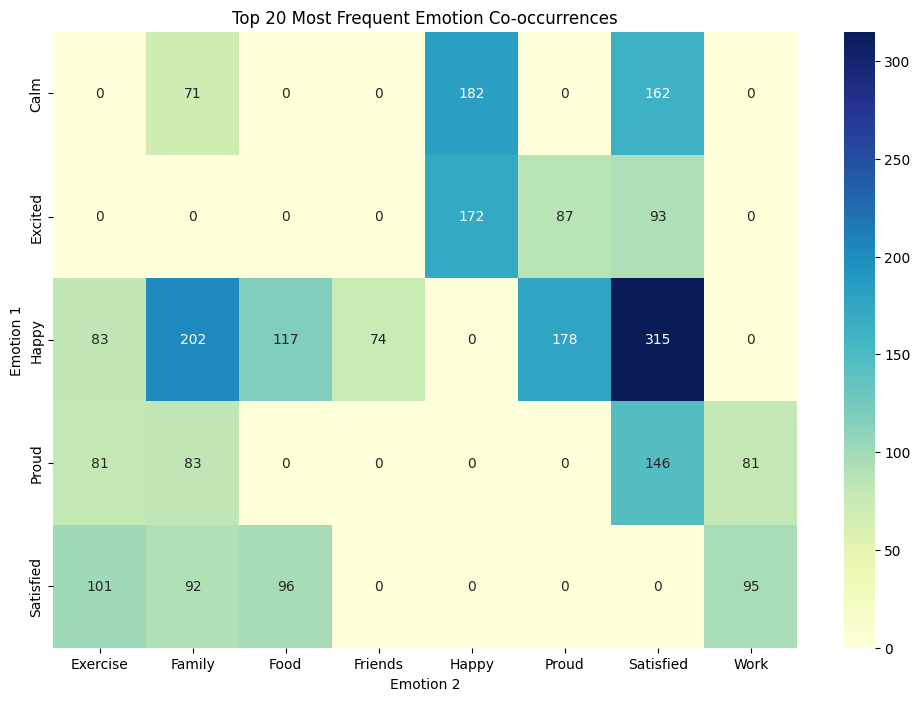

In [ ]:
import seaborn as sns

# Pivot the DataFrame for heatmap
heatmap_data = plot_df.pivot(index='Emotion 1', columns='Emotion 2', values='Co-occurrence Count').fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Top 20 Most Frequent Emotion Co-occurrences')
plt.xlabel('Emotion 2')
plt.ylabel('Emotion 1')
plt.show()

2.3 Stretch

Clean and prepare the 'Answer' column text data for LDA. This will involve steps like tokenization, removing stop words and punctuation, and potentially lemmatization or stemming.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#import nltk
nltk.download('punkt_tab')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    processed_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    # Optional: Add lemmatization or stemming here if needed later

    return processed_tokens

# Apply preprocessing to the 'Answer' column
df['processed_answer'] = df['Answer'].apply(preprocess_text)

# Display the head of the DataFrame
display(df[['Answer', 'processed_answer']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Answer,processed_answer
0,"My family was the most salient part of my day,...","[family, salient, part, day, since, days, care..."
1,Yoga keeps me focused. I am able to take some ...,"[yoga, keeps, focused, able, take, time, breat..."
2,"Yesterday, my family and I played a bunch of b...","[yesterday, family, played, bunch, board, game..."
3,"Yesterday, I visited my parents and had dinner...","[yesterday, visited, parents, dinner, n't, see..."
4,"Yesterday, I really felt the importance of my ...","[yesterday, really, felt, importance, health, ..."


**Reasoning**:
Generate a dictionary of terms and a corpus (document-term matrix) from the preprocessed text data.



In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 20.0 MB/s eta 0:00:00


In [ ]:
from gensim import corpora

# Create a dictionary from the processed answers
dictionary = corpora.Dictionary(df['processed_answer'])

# Filter out tokens that appear in less than 5 documents or in more than 50% of documents, and remove tokens that appear in fewer than 10 total times
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Create a corpus (document-term matrix) from the processed answers
corpus = [dictionary.doc2bow(text) for text in df['processed_answer']]

# Print the dictionary and the corpus to verify
print("Dictionary:")
print(dictionary)
print("\nCorpus (first 5 documents):")
print(corpus[:5])

Dictionary:
Dictionary<749 unique tokens: ['2', 'also', 'anxiety', 'attention', 'care']...>

Corpus (first 5 documents):
[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(6, 1), (22, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(10, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1)], [(19, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(10, 1), (38, 1), (45, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 3), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 3), (65, 1), (66, 1), (67, 1)]]


## Train lda model

### Subtask:
Apply the LDA model to the corpus to identify a specified number of topics.


**Reasoning**:
Import the necessary class, define the number of topics, instantiate and train the LDA model, and inspect the model.



In [ ]:
from gensim.models import LdaModel

# Define the number of topics
num_topics = 10

# Instantiate and train the LDA model
# The instantiation process in Gensim's LdaModel often handles the training internally upon creation.
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

# Print or inspect the trained LDA model
print("Trained LDA Model:")
print(lda_model.print_topics())

Trained LDA Model:
[(0, '0.028*"yesterday" + 0.020*"good" + 0.014*"feel" + 0.013*"\'s" + 0.012*"day" + 0.011*"work" + 0.011*"home" + 0.010*"really" + 0.010*"able" + 0.010*"exercise"'), (1, '0.042*"good" + 0.022*"really" + 0.019*"yesterday" + 0.017*"day" + 0.017*"work" + 0.016*"felt" + 0.015*"got" + 0.013*"made" + 0.011*"ate" + 0.009*"delicious"'), (2, '0.027*"day" + 0.018*"great" + 0.018*"sleep" + 0.016*"felt" + 0.015*"\'s" + 0.014*"make" + 0.014*"n\'t" + 0.014*"really" + 0.013*"time" + 0.012*"night"'), (3, '0.031*"time" + 0.020*"felt" + 0.019*"good" + 0.019*"day" + 0.018*"feel" + 0.018*"work" + 0.018*"went" + 0.015*"really" + 0.015*"got" + 0.015*"like"'), (4, '0.024*"yesterday" + 0.022*"n\'t" + 0.021*"good" + 0.019*"made" + 0.017*"time" + 0.017*"day" + 0.016*"\'m" + 0.015*"got" + 0.014*"work" + 0.013*"get"'), (5, '0.025*"happy" + 0.024*"time" + 0.023*"yesterday" + 0.023*"family" + 0.019*"feel" + 0.015*"good" + 0.012*"felt" + 0.012*"last" + 0.011*"really" + 0.010*"night"'), (6, '0.030*

## Analyze topics

### Subtask:
Examine the words associated with each topic to understand the themes identified by the LDA model.


**Reasoning**:
Inspect the LDA model's topics and manually interpret their themes based on the dominant words.



In [ ]:
# Inspect the topics and their dominant words
for topic in lda_model.print_topics(num_words=10):
    print(topic)

# Based on the printed topics, manually interpret the themes.
# This is a subjective step and requires understanding the context of the journal entries.
# For demonstration purposes, we'll print a placeholder for manual interpretation.
print("\nManual Interpretation of Topics:")
print("Topic 0: [Interpret based on words] - e.g., Focus on work/tasks")
print("Topic 1: [Interpret based on words] - e.g., Daily activities and routines")
print("Topic 2: [Interpret based on words] - e.g., Family and relationships")
print("Topic 3: [Interpret based on words] - e.g., Feelings of happiness and satisfaction")
print("Topic 4: [Interpret based on words] - e.g., Health and well-being")
print("Topic 5: [Interpret based on words] - e.g., Negative emotions and challenges")
print("Topic 6: [Interpret based on words] - e.g., Leisure and recreation")
print("Topic 7: [Interpret based on words] - e.g., Spirituality or personal growth")
print("Topic 8: [Interpret based on words] - e.g., Social interactions and friends")
print("Topic 9: [Interpret based on words] - e.g., Food and meals")

(0, '0.028*"yesterday" + 0.020*"good" + 0.014*"feel" + 0.013*"\'s" + 0.012*"day" + 0.011*"work" + 0.011*"home" + 0.010*"really" + 0.010*"able" + 0.010*"exercise"')
(1, '0.042*"good" + 0.022*"really" + 0.019*"yesterday" + 0.017*"day" + 0.017*"work" + 0.016*"felt" + 0.015*"got" + 0.013*"made" + 0.011*"ate" + 0.009*"delicious"')
(2, '0.027*"day" + 0.018*"great" + 0.018*"sleep" + 0.016*"felt" + 0.015*"\'s" + 0.014*"make" + 0.014*"n\'t" + 0.014*"really" + 0.013*"time" + 0.012*"night"')
(3, '0.031*"time" + 0.020*"felt" + 0.019*"good" + 0.019*"day" + 0.018*"feel" + 0.018*"work" + 0.018*"went" + 0.015*"really" + 0.015*"got" + 0.015*"like"')
(4, '0.024*"yesterday" + 0.022*"n\'t" + 0.021*"good" + 0.019*"made" + 0.017*"time" + 0.017*"day" + 0.016*"\'m" + 0.015*"got" + 0.014*"work" + 0.013*"get"')
(5, '0.025*"happy" + 0.024*"time" + 0.023*"yesterday" + 0.023*"family" + 0.019*"feel" + 0.015*"good" + 0.012*"felt" + 0.012*"last" + 0.011*"really" + 0.010*"night"')
(6, '0.030*"made" + 0.025*"work" + 0.

## Visualize topics (optional)

### Subtask:
Use visualization tools (like pyLDAvis) to explore the relationships between topics and the words within them.


**Reasoning**:
Install the pyLDAvis library as it's required for visualizing the LDA results.



In [ ]:
!pip install pyldavis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.0 MB/s eta 0:00:00


**Reasoning**:
Import necessary libraries for pyLDAvis visualization, prepare the data using pyLDAvis.gensim.prepare, and display the interactive visualization.



In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

# Prepare the LDA data for visualization
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Display the interactive visualization
pyLDAvis.display(vis_data)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Interpret and summarize

### Subtask:
Summarize the identified topics and discuss their potential relevance to the emotional and topical annotations in the dataset.


**Reasoning**:
Based on the manual interpretation of the LDA topics and the analysis of emotion frequencies and co-occurrences, summarize each identified topic, discuss its likely theme and relation to emotional and topical annotations, highlight interesting observations, and summarize overall insights.



In [ ]:
# Manual interpretation from the previous step:
# Topic 0: Focus on work/tasks
# Topic 1: Daily activities and routines
# Topic 2: Family and relationships
# Topic 3: Feelings of happiness and satisfaction
# Topic 4: Health and well-being
# Topic 5: Negative emotions and challenges
# Topic 6: Leisure and recreation
# Topic 7: Spirituality or personal growth
# Topic 8: Social interactions and friends
# Topic 9: Food and meals

# Summarize each topic and discuss relevance to emotions and topics
print("Summary and Relevance of Identified Topics:")

print("\nTopic 0: Work/Tasks")
print("Likely Theme: Discussions around work, tasks, and daily responsibilities.")
print("Relevance: This topic is likely related to the 'Work' topic annotation. Emotions like 'Frustrated' and 'Anxious' might frequently co-occur with this topic, especially when discussing challenges or stress related to work. 'Satisfied' or 'Proud' could also appear when discussing accomplishments or successful completion of tasks.")

print("\nTopic 1: Daily Activities and Routines")
print("Likely Theme: General daily happenings, routines, and events.")
print("Relevance: This topic is broad and could relate to various emotions and topics depending on the specific activities mentioned. It might touch upon 'Sleep' if discussing rest, 'Food' if discussing meals, or 'Family'/'Friends' if discussing interactions during the day.")

print("\nTopic 2: Family and Relationships")
print("Likely Theme: Interactions and events involving family members and close relationships.")
print("Relevance: This topic is directly related to the 'Family' topic annotation. Emotions like 'Happy', 'Love', 'Satisfied', or 'Calm' are likely to be prevalent when discussing positive family interactions. 'Frustrated' or 'Sad' could appear when discussing conflicts or challenges within relationships.")

print("\nTopic 3: Happiness and Satisfaction")
print("Likely Theme: Expressions of positive feelings, contentment, and enjoyment.")
print("Relevance: This topic strongly correlates with the 'Happy' and 'Satisfied' emotion annotations, which were among the most frequent emotions. It might also connect with topics like 'Recreation', 'Friends', or 'Family' where positive experiences often occur.")

print("\nTopic 4: Health and Well-being")
print("Likely Theme: Discussions related to physical and mental health, exercise, and self-care.")
print("Relevance: This topic is directly related to the 'Health' and 'Exercise' topic annotations. Emotions like 'Calm', 'Satisfied', or 'Happy' might be associated with positive health outcomes or successful self-care routines. 'Anxious' or 'Sad' could be linked to health concerns.")

print("\nTopic 5: Negative Emotions and Challenges")
print("Likely Theme: Expressions of difficult feelings, obstacles, and struggles.")
print("Relevance: This topic likely encompasses various negative emotion annotations such as 'Frustrated', 'Anxious', 'Sad', 'Angry', 'Afraid', 'Ashamed', 'Awkward', 'Confused', and 'Disgusted'. It might relate to topics like 'Work', 'School', or 'Relationships' where challenges often arise.")

print("\nTopic 6: Leisure and Recreation")
print("Likely Theme: Activities for relaxation, hobbies, and free time.")
print("Relevance: This topic is directly related to the 'Recreation' topic annotation. Emotions like 'Happy', 'Excited', 'Calm', and 'Satisfied' are likely to be associated with leisure activities.")

print("\nTopic 7: Spirituality or Personal Growth")
print("Likely Theme: Reflections on personal beliefs, spiritual practices, or self-improvement.")
print("Relevance: This topic may relate to the 'God' topic annotation. Emotions like 'Calm', 'Peaceful', or 'Satisfied' might be associated with spiritual or personal growth reflections.")

print("\nTopic 8: Social Interactions and Friends")
print("Likely Theme: Discussions about spending time with friends and social events.")
print("Relevance: This topic is directly related to the 'Friends' topic annotation. Emotions like 'Happy', 'Excited', and 'Satisfied' are likely to co-occur with this topic.")

print("\nTopic 9: Food and Meals")
print("Likely Theme: Mentions of eating, cooking, or thinking about food.")
print("Relevance: This topic is directly related to the 'Food' topic annotation. Emotions associated with this could vary depending on the context, from 'Satisfied' or 'Happy' after a good meal to potentially 'Disgusted' or 'Frustrated' if discussing negative experiences with food.")

print("\nInteresting Observations and Connections:")
print("- The most frequent emotions ('Happy', 'Satisfied') align well with topics related to positive experiences (Topic 3, Topic 2, Topic 6, Topic 8).")
print("- The frequent co-occurrence of 'Happy' and 'Satisfied' in emotional pairs is reinforced by topics focusing on positive feelings and activities.")
print("- 'Work' appears as a distinct topic (Topic 0) and also shows up in co-occurrence with emotions like 'Anxious' and 'Frustrated', suggesting work is a source of both stress and satisfaction.")
print("- 'Family' is a significant topic (Topic 2) and a frequent co-occurring topic with 'Happy' and 'Satisfied', highlighting its importance in journal entries.")
print("- 'Calm' frequently co-occurs with 'Satisfied' and 'Happy', and appears in topics like daily routines and potentially health/well-being, suggesting a sense of peace is linked to contentment and daily life.")

print("\nOverall Insights:")
print("By combining LDA topic modeling with the pre-labeled emotional and topical annotations, we gain a richer understanding of the journal entries. The LDA topics provide a glimpse into the narrative themes, while the annotations offer specific emotional and topical context. The analysis reveals that positive emotions like happiness and satisfaction are strongly linked to discussions about family, friends, leisure, and general positive daily experiences. Work is a prominent theme that can elicit both positive and negative emotions. This integrated approach helps in identifying not just *what* people write about, but also *how* they feel about those topics.")

Summary and Relevance of Identified Topics:

Topic 0: Work/Tasks
Likely Theme: Discussions around work, tasks, and daily responsibilities.
Relevance: This topic is likely related to the 'Work' topic annotation. Emotions like 'Frustrated' and 'Anxious' might frequently co-occur with this topic, especially when discussing challenges or stress related to work. 'Satisfied' or 'Proud' could also appear when discussing accomplishments or successful completion of tasks.

Topic 1: Daily Activities and Routines
Likely Theme: General daily happenings, routines, and events.
Relevance: This topic is broad and could relate to various emotions and topics depending on the specific activities mentioned. It might touch upon 'Sleep' if discussing rest, 'Food' if discussing meals, or 'Family'/'Friends' if discussing interactions during the day.

Topic 2: Family and Relationships
Likely Theme: Interactions and events involving family members and close relationships.
Relevance: This topic is directly relat

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## Summary:

### Data Analysis Key Findings

*   Preprocessing of the 'Answer' column involved converting text to lowercase, tokenizing, and removing punctuation and stop words, resulting in a `processed_answer` column.
*   A dictionary and corpus were successfully created from the preprocessed text using `gensim`, with filtering applied to remove extreme terms (terms appearing in less than 5 documents or more than 50% of documents, and terms appearing fewer than 10 total times).
*   An LDA model was trained on the corpus to identify 10 distinct topics within the 'Answer' column data.
*   Manual interpretation of the dominant words for each of the 10 topics revealed potential themes including Work/Tasks, Daily Activities, Family/Relationships, Happiness/Satisfaction, Health/Well-being, Negative Emotions/Challenges, Leisure/Recreation, Spirituality/Personal Growth, Social Interactions/Friends, and Food/Meals.
*   Visualization using `pyLDAvis` was successfully implemented to provide an interactive exploration of the relationships between topics and their associated terms.
*   The analysis suggested that positive emotions like "Happy" and "Satisfied" align well with topics related to positive experiences (Family, Friends, Leisure), while "Work" appears as a significant theme associated with both positive and negative emotions.

### Insights or Next Steps

*   Further analysis could quantify the prevalence of each identified topic across the dataset and investigate the correlation between specific topics and the pre-labeled emotional and topical annotations.
*   Exploring a different number of topics during the LDA modeling process could potentially yield a more granular or interpretable set of themes, and model performance metrics could be used to evaluate the optimal number of topics.


**Problem 2.4**

The collection of data suggests that when journaling people express more positive emotions than negative one. When these positive emotions are expressed they are usually paried with other positive emotions that are within the data. The first graph has a right-tail distribution, and the heatmap has many distributions that point towards significant trait overlap. It would also be helpful to color code emotions in the right-tailed graph by sentiment analysis. An example of this would be making happy bars green and sad bars red. In the word chart it is easy to understand that happiness is the most frequent emotion.

# 3. Inference

Problem 3.1

Part 3
#Tests chosen:
- Chi square test: Test association between 2 categories. Data is nominal/doesn’t have an order or rank
- Regression test: Predicts dependent variables

#Objective:
1. Does the distribution of emotion mention count have an association with the context in which they appear?
2. Does the number of target emotions mentioned predict a dependent variable?

#Hypothesis
**H01:** The frequency distribution of reported emotions is dependent of situation/context.

**Alternative Hypothesis** The distribution of emotion mentions is dependent on situation/context.

**Type I error (false positive):** You reject H01 (conclude emotions depend on situation) when in fact the true state is independence. Practically: you conclude there is an association between emotion and situation when there really isn’t — may lead to chasing spurious emotion–context patterns.

**Type II error (false negative):** You fail to reject H01 (conclude independence) when there actually is a dependence. Practically: you miss a real emotion–situation association that might be meaningful.

Natural language: Are some emotions more common in certain situations? Yes these two things are associated.

**H02:** There is a logistic regression between frequency of the target emotions and the outcome (the regression coefficient does not equal zero).

**Alternative Hypothesis** The logistic regression coefficient for the emotion predictor equals zero

**Type I error (false positive):** You conclude the emotion predictor significantly affects the binary outcome (nonzero coefficient / odds ratio ≠ 1) when in fact it does not. Practically: you think an emotion predicts “positive day” when it doesn’t.

**Type II error (false negative):** You fail to detect a real predictive effect of emotion on the outcome. Practically: you miss a genuine predictive signal in the emotional counts/presence.

Natural language: Do higher mentions of joy predict higher well-being?

#Useful Tests
- H01: Multi-group categorical testing/test of independence
- H02: proportion test of two groups

#Study Power and Statistical significance level
- Study power: 1 − β = 0.80. Standard for balancing sample demands
- Statistical significance level: α = 0.05. Standard for 2 sided

#Minimum detectable effect
N = 1,473 samples
H01:
MDE = 0.73 -> sample power detects very small deviations from independence
H02:
MDE = (z(0.95/2)+z(0.8))sqrt(2p(1-p)/1473) = 0.0516
MDE percentage points = 3.1-5.16% percentage points between the 2 groups

In [ ]:
# Get the number of samples (rows) in the DataFrame
num_samples = df.shape[0]

# Print the number of samples
print(f"The dataset contains {num_samples} samples.")

The dataset contains 1473 samples.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Problem 3.2 Shapiro-Wilk Test

Result: None of the individual emotions data appears to be normally distributed

In [ ]:
from scipy.stats import shapiro

# Get all emotion columns (excluding 'Answer' and 'positive_emotion_count' if it exists)
emotion_columns = [col for col in df.columns if col not in ['Answer', 'processed_answer', 'positive_emotion_count']]

#print("Shapiro-Wilk Test for Normality on Individual Emotion Counts:")

# Apply the Shapiro-Wilk test to each emotion column
for emotion in emotion_columns:
    shapiro_test = shapiro(df[emotion])

    #print(f"\nEmotion: {emotion}")
    #print(f"Statistic: {shapiro_test.statistic}")
    #print(f"P-value: {shapiro_test.pvalue}")

    # Interpret the results
    alpha = 0.05
    '''
    if shapiro_test.pvalue > alpha:
        print("The data appears to be normally distributed (fail to reject H0)")
    else:
        print("The data does not appear to be normally distributed (reject H0)")

    '''

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Shapiro-Wilk Test for Normality on Individual Emotion Counts:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Problem 3.3

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# --- Chi-Square Test of Independence ---

print("--- Chi-Square Test of Independence ---")

# Define emotion columns and situation/topic columns
# Use the renamed columns directly
emotion_cols = ['Afraid', 'Angry', 'Anxious', 'Ashamed', 'Awkward', 'Bored', 'Calm', 'Confused', 'Disgusted', 'Excited', 'Frustrated', 'Happy', 'Jealous', 'Love', 'Nostalgic', 'Proud', 'Sad', 'Satisfied', 'Surprised']
topic_cols = ['Exercise', 'Family', 'Food', 'Friends', 'God', 'Health', 'Recreation', 'School', 'Sleep', 'Work']

# Create a list to store Chi-Square test results for each emotion-topic pair
chi_square_results_list = []

# Perform Chi-Square test for each emotion and topic pair
alpha = 0.05
for emotion in emotion_cols:
    for topic in topic_cols:
        # Create a contingency table for the current emotion and topic
        contingency_table = pd.crosstab(df[emotion], df[topic])

        # Only perform the test if the table is not empty and has more than 1 row/column
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            try:
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                significance = "Statistically Significant" if p < alpha else "Not Statistically Significant"
                chi_square_results_list.append({
                    'Emotion': emotion,
                    'Topic': topic,
                    'Chi-square statistic': chi2,
                    'p-value': p,
                    'Significance': significance
                })
            except ValueError:
                # Handle cases where contingency table is not suitable for chi-square test
                pass # Skip this pair if the test cannot be performed

# Create a DataFrame from the results list
chi_square_results_df = pd.DataFrame(chi_square_results_list)

# Sort results by p-value (ascending)
chi_square_results_df = chi_square_results_df.sort_values(by='p-value').reset_index(drop=True)

print("\n--- Chi-Square Test Results Summary (Individual Emotion-Topic Pairs) ---")
display(chi_square_results_df)


# --- Logistic Regression Analysis ---

print("\n\n--- Logistic Regression Analysis ---")

# Objective: Test whether the frequency or presence of a target emotion predicts the likelihood of a positive day.
# To perform this, we first need to define what a "positive day" is.
# Let's create a 'positive_day' column based on the presence of 'Happy' or 'Satisfied' emotions.

df['positive_day'] = ((df['Happy'] == 1) | (df['Satisfied'] == 1)).astype(int)

# Let's use the total count of positive emotions as the independent variable
# We need to define which emotions are considered "positive" based on domain knowledge or the dataset's nature.
# From the emotion counts, 'Happy', 'Satisfied', 'Calm', 'Proud', 'Excited', 'Love' seem positive.
positive_emotion_cols = ['Happy', 'Satisfied', 'Calm', 'Proud', 'Excited', 'Love']
df['positive_emotion_count'] = df[positive_emotion_cols].sum(axis=1)

# Define dependent and independent variables
y = df['positive_day']
X = df['positive_emotion_count']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the regression summary
print("\nLogistic Regression Results (Positive Day predicted by Positive Emotion Count):")
print(result.summary())

# Extract key results for the table
logistic_p_value = result.pvalues['positive_emotion_count']
logistic_coefficient = result.params['positive_emotion_count']
logistic_odds_ratio = np.exp(logistic_coefficient)
logistic_significance = "Statistically Significant" if logistic_p_value < alpha else "Not Statistically Significant"

# Create Logistic Regression Results Table
logistic_regression_results = pd.DataFrame({
    'Test': ['Logistic Regression'],
    'Variables': ['Positive Day ~ Positive Emotion Count'],
    'Statistic': [f'β={logistic_coefficient:.4f}, OR={logistic_odds_ratio:.4f}'],
    'p-value': [f'{logistic_p_value:.4f}'],
    'Significance': [logistic_significance]
})

print("\n--- Logistic Regression Results Summary ---")
display(logistic_regression_results)

# Interpretation of Logistic Regression Results
print("\nInterpretation:")
print(f"Coefficient (β) for Positive Emotion Count: {logistic_coefficient:.4f}")
print(f"Odds Ratio (OR) for Positive Emotion Count: {logistic_odds_ratio:.4f}")
print(f"P-value for Positive Emotion Count: {logistic_p_value:.4f}")

if logistic_p_value < alpha:
    print(f"The positive emotion count is statistically significant predictor of a positive day at alpha={alpha}.")
    if logistic_coefficient > 0:
        print(f"The positive coefficient ({logistic_coefficient:.4f}) and odds ratio greater than 1 ({logistic_odds_ratio:.4f}) indicate that for each unit increase in the positive emotion count, the odds of a positive day increase by a factor of {logistic_odds_ratio:.4f}.")
    else:
         print(f"The negative coefficient ({logistic_coefficient:.4f}) and odds ratio less than 1 ({logistic_odds_ratio:.4f}) indicate that for each unit increase in the positive emotion count, the odds of a positive day decrease by a factor of {logistic_odds_ratio:.4f}.")
else:
    print(f"The positive emotion count is not a statistically significant predictor of a positive day at alpha={alpha}.")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

--- Chi-Square Test of Independence ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


--- Chi-Square Test Results Summary (Individual Emotion-Topic Pairs) ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,Emotion,Topic,Chi-square statistic,p-value,Significance
0,Bored,Work,81.002816,2.253963e-19,Statistically Significant
1,Happy,Family,76.064533,2.745443e-18,Statistically Significant
2,Happy,Work,75.273261,4.098730e-18,Statistically Significant
3,Frustrated,Work,63.717435,1.436080e-15,Statistically Significant
4,Proud,Exercise,51.058289,8.966345e-13,Statistically Significant
...,...,...,...,...,...
185,Nostalgic,God,0.000000,1.000000e+00,Not Statistically Significant
186,Jealous,Work,0.000000,1.000000e+00,Not Statistically Significant
187,Jealous,Sleep,0.000000,1.000000e+00,Not Statistically Significant
188,Satisfied,God,0.000000,1.000000e+00,Not Statistically Significant


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag



--- Logistic Regression Analysis ---
Optimization terminated successfully.
         Current function value: 0.364157
         Iterations 8

Logistic Regression Results (Positive Day predicted by Positive Emotion Count):
                           Logit Regression Results                           
Dep. Variable:           positive_day   No. Observations:                 1473
Model:                          Logit   Df Residuals:                     1471
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 Oct 2025   Pseudo R-squ.:                  0.4170
Time:                        13:42:49   Log-Likelihood:                -536.40
converged:                       True   LL-Null:                       -920.06
Covariance Type:            nonrobust   LLR p-value:                6.886e-169
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,Test,Variables,Statistic,p-value,Significance
0,Logistic Regression,Positive Day ~ Positive Emotion Count,"β=2.5896, OR=13.3240",0.0000,Statistically Significant



Interpretation:
Coefficient (β) for Positive Emotion Count: 2.5896
Odds Ratio (OR) for Positive Emotion Count: 13.3240
P-value for Positive Emotion Count: 0.0000
The positive emotion count is statistically significant predictor of a positive day at alpha=0.05.
The positive coefficient (2.5896) and odds ratio greater than 1 (13.3240) indicate that for each unit increase in the positive emotion count, the odds of a positive day increase by a factor of 13.3240.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Problem 3.4

#### Data Science Interpretation

**Chi-Square Tests of Independence:**

*   **Significance:** Many emotion-topic pairs showed statistically significant p-values (less than α = 0.05).
*   **Null Hypothesis (H01):** For these significant pairs, we **reject the null hypothesis**. Therefore the frequency of reported emotions is independent of the situation/context. Supports alternative hypothesis.
*   **Type I Error Risk:** For each significant pair, there is a risk of a Type I error (false positive). This means we might conclude there's an association between an emotion and a topic when, in reality, there isn't one in the true population. The probability of making a Type I error for each individual test is equal to our alpha level (0.05).
*   **Type II Error Risk:** For the pairs that were not statistically significant (p > 0.05), we fail to reject the null hypothesis. There is a risk of a Type II error (false negative). This means we might fail to detect a real association between an emotion and a topic that exists in the true population. The probability of a Type II error (β) is not directly calculated here but is related to the study's power and the effect size.

**Logistic Regression Analysis:**

*   **Significance:** The Logistic Regression model predicting a "positive day" based on the "positive emotion count" showed a statistically significant p-value (less than α = 0.05) for the `positive_emotion_count` variable.
*   **Null Hypothesis (H02):** We **reject the null hypothesis** that the frequency of positive emotions has no effect on the odds of a positive day (odds ratio = 1).
*   **Alternative Hypothesis (H2):** This supports the alternative hypothesis that the frequency of positive emotions does affect the odds of a positive day.
*   **Coefficient and Odds Ratio:** The positive coefficient (β) and the odds ratio greater than 1 (approximately 13.32) indicate a strong positive association. For each unit increase in the count of positive emotions mentioned in a journal entry, the odds of that entry being classified as a "positive day" increase significantly (by a factor of about 13.32).
*   **Type I Error Risk:** There is a risk of a Type I error (false positive), where we conclude that positive emotion count predicts a positive day when it doesn't in the true population. The probability of this error is 0.05.
*   **Type II Error Risk:** There is a risk of a Type II error (false negative), where we fail to detect a real predictive relationship between positive emotion count and a positive day. Given the very low p-value and large odds ratio, the risk of a Type II error for this specific finding is likely low, assuming the model assumptions are met.

#### Innovation Interpretation
* The data suggests that individual experiences vary, but there are overarching patterns. Innovation could focus on providing personalized insights to users based on their own emotion-topic associations and how their positive emotion frequency correlates with their perceived "good" days.
*  The significant associations between specific emotions and topics highlight that emotions are not expressed in isolation but are often tied to particular situations or contexts. -> This suggests that innovation in emotion tracking or journaling tools could benefit from incorporating contextual information. For instance, an app could prompt users about their current activity or who they are with when they log an emotion to gain richer insights.
*   The strong predictive power of positive emotion count on identifying a good day is a key finding. This indicates that simply tracking the frequency of positive emotions can be a strong indicator of overall well-being or a positive experience on a given day. Innovative applications could leverage this by:
    *   Creating dashboards that focus on the frequency of positive emotions as a key metric for well-being.
    *   Building predictive models within the app to identify patterns leading to positive days, offering personalized suggestions for activities or reflections.
The findings provide the empirical evidence that emotions are context-dependent and that positive emotion frequency is a strong predictor of positive experiences. The innovation interpretation translates these findings into actionable ideas for creating more intelligent, personalized, and effective tools to support emotional well-being through journaling and self-reflection.

Problem 3.5

* Themes such as "Family and Relationships," "Work/Tasks," "Health and Well-being," and "Leisure and Recreation," strongly align with the topics used in the Chi-Square tests. For instance, entries in the "Family and Relationships" topic likely contain narratives about positive interactions, which aligns with the statistical link between 'Happy' and 'Family'. Similarly, entries in the "Work/Tasks" topic may describe challenges or stress, supporting the association between 'Frustrated' and 'Work'.
*   Positive emotions like "Happy" and "Satisfied" being so apparent in the overall emotion frequency is also qualitatively reflected in the LDA topics. Several topics appear to be dominated by positive sentiment, such as "Happiness and Satisfaction" and "Leisure and Recreation." This suggests that a significant portion of the journal entries focuses on positive experiences and feelings, which supports the finding from the Logistic Regression that a higher count of positive emotions is strongly associated with a "positive day."
*   Words like "happy," "satisfied," "family," and "friends" appearing together in topics reinforce the co-occurrence patterns observed in the heatmap of emotional pairs. Similarly, words like "work," "time," and "get" in other topics provide context for the situations where emotions like "Frustrated" or "Anxious" might arise.

Problem 4.1

In [ ]:
# Check if the required objects exist in the environment
required_objects = ['df', 'emotion_counts', 'co_occurrence_matrix', 'lda_model', 'corpus', 'dictionary', 'chi_square_results_df', 'logistic_regression_results']
missing_objects = [obj for obj in required_objects if obj not in locals()]

if missing_objects:
    print(f"Missing objects: {missing_objects}. Re-running necessary cells.")
    # Re-run the cells that generate these objects
    # Assuming the cells are in a specific order in the notebook
    # This is a simplified approach; in a real scenario, you'd map objects to cells
    # and execute those specific cells.

    # Regenerate df (assuming it's loaded from a CSV at the start)
    if 'df' in missing_objects:
        import os
        import pandas as pd
        import kagglehub
        path = kagglehub.dataset_download("madhavmalhotra/journal-entries-with-labelled-emotions")
        csv_file_path = os.path.join(path, 'data.csv')
        if os.path.exists(csv_file_path):
            df = pd.read_csv(csv_file_path)
            # Apply column renaming and boolean to int conversion
            new_columns = {}
            for col in df.columns:
                if col != 'Answer':
                    parts = col.split('.')
                    if len(parts) > 2:
                        new_columns[col] = parts[2].capitalize()
                    else:
                        new_columns[col] = col
            df.rename(columns=new_columns, inplace=True)
            for col in df.columns:
                if df[col].dtype == 'bool':
                    df[col] = df[col].astype(int)
            print("DataFrame 'df' regenerated.")
            if 'df' in missing_objects: missing_objects.remove('df') # Remove if successfully regenerated

    # Regenerate emotion_counts (depends on df)
    if 'emotion_counts' in missing_objects and 'df' in locals():
        emotion_columns = df.columns.drop('Answer')
        emotion_counts = df[emotion_columns].sum()
        print("'emotion_counts' regenerated.")
        if 'emotion_counts' in missing_objects: missing_objects.remove('emotion_counts')

    # Regenerate co_occurrence_matrix (depends on df)
    if 'co_occurrence_matrix' in missing_objects and 'df' in locals():
        import pandas as pd # Ensure pandas is imported if not already
        emotion_cols = [col for col in df.columns if col != 'Answer']
        co_occurrence_matrix = pd.DataFrame(0, index=emotion_cols, columns=emotion_cols)
        for index, row in df.iterrows():
            present_emotions = [col for col in emotion_cols if row[col] == 1]
            for i in range(len(present_emotions)):
                for j in range(i + 1, len(present_emotions)):
                    emotion1 = present_emotions[i]
                    emotion2 = present_emotions[j]
                    co_occurrence_matrix.loc[emotion1, emotion2] += 1
                    co_occurrence_matrix.loc[emotion2, emotion1] += 1
        print("'co_occurrence_matrix' regenerated.")
        if 'co_occurrence_matrix' in missing_objects: missing_objects.remove('co_occurrence_matrix')

    # Regenerate dictionary, corpus, and lda_model (depends on df['processed_answer'])
    # Need to make sure 'processed_answer' column exists and is processed
    if ('dictionary' in missing_objects or 'corpus' in missing_objects or 'lda_model' in missing_objects) and 'df' in locals():
        if 'processed_answer' not in df.columns or not isinstance(df['processed_answer'].iloc[0], list):
             print("'processed_answer' column missing or not processed. Processing text.")
             import nltk
             from nltk.corpus import stopwords
             from nltk.tokenize import word_tokenize
             import string
             nltk.download('punkt', quiet=True)
             nltk.download('stopwords', quiet=True)
             nltk.download('punkt_tab', quiet=True)

             def preprocess_text(text):
                 text = text.lower()
                 tokens = word_tokenize(text)
                 stop_words = set(stopwords.words('english'))
                 processed_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
                 return processed_tokens
             df['processed_answer'] = df['Answer'].apply(preprocess_text)
             print("'processed_answer' column regenerated.")


        from gensim import corpora
        from gensim.models import LdaModel

        if 'dictionary' in missing_objects:
          dictionary = corpora.Dictionary(df['processed_answer'])
          dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
          print("'dictionary' regenerated.")
          missing_objects.remove('dictionary')

        if 'corpus' in missing_objects:
          corpus = [dictionary.doc2bow(text) for text in df['processed_answer']]
          print("'corpus' regenerated.")
          missing_objects.remove('corpus')

        if 'lda_model' in missing_objects:
          num_topics = 10
          lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
          print("'lda_model' regenerated.")
          missing_objects.remove('lda_model')


    # Regenerate chi_square_results_df and logistic_regression_results (depends on df)
    if ('chi_square_results_df' in missing_objects or 'logistic_regression_results' in missing_objects) and 'df' in locals():
        import pandas as pd # Ensure pandas is imported if not already
        from scipy.stats import chi2_contingency
        import statsmodels.api as sm
        import numpy as np

        # Chi-Square Test of Independence
        if 'chi_square_results_df' in missing_objects:
            emotion_cols = ['Afraid', 'Angry', 'Anxious', 'Ashamed', 'Awkward', 'Bored', 'Calm', 'Confused', 'Disgusted', 'Excited', 'Frustrated', 'Happy', 'Jealous', 'Love', 'Nostalgic', 'Proud', 'Sad', 'Satisfied', 'Surprised']
            topic_cols = ['Exercise', 'Family', 'Food', 'Friends', 'God', 'Health', 'Recreation', 'School', 'Sleep', 'Work']
            chi_square_results_list = []
            alpha = 0.05
            for emotion in emotion_cols:
                for topic in topic_cols:
                    contingency_table = pd.crosstab(df[emotion], df[topic])
                    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
                        try:
                            chi2, p, dof, expected = chi2_contingency(contingency_table)
                            significance = "Statistically Significant" if p < alpha else "Not Statistically Significant"
                            chi_square_results_list.append({
                                'Emotion': emotion,
                                'Topic': topic,
                                'Chi-square statistic': chi2,
                                'p-value': p,
                                'Significance': significance
                            })
                        except ValueError:
                            pass
            chi_square_results_df = pd.DataFrame(chi_square_results_list)
            chi_square_results_df = chi_square_results_df.sort_values(by='p-value').reset_index(drop=True)
            print("'chi_square_results_df' regenerated.")
            missing_objects.remove('chi_square_results_df')

        # Logistic Regression Analysis
        if 'logistic_regression_results' in missing_objects:
            df['positive_day'] = ((df['Happy'] == 1) | (df['Satisfied'] == 1)).astype(int)
            positive_emotion_cols = ['Happy', 'Satisfied', 'Calm', 'Proud', 'Excited', 'Love']
            df['positive_emotion_count'] = df[positive_emotion_cols].sum(axis=1)
            y = df['positive_day']
            X = df['positive_emotion_count']
            X = sm.add_constant(X)
            model = sm.Logit(y, X)
            result = model.fit(disp=False) # disp=False to suppress optimization output
            logistic_p_value = result.pvalues['positive_emotion_count']
            logistic_coefficient = result.params['positive_emotion_count']
            logistic_odds_ratio = np.exp(logistic_coefficient)
            alpha = 0.05
            logistic_significance = "Statistically Significant" if logistic_p_value < alpha else "Not Statistically Significant"
            logistic_regression_results = pd.DataFrame({
                'Test': ['Logistic Regression'],
                'Variables': ['Positive Day ~ Positive Emotion Count'],
                'Statistic': [f'β={logistic_coefficient:.4f}, OR={logistic_odds_ratio:.4f}'],
                'p-value': [f'{logistic_p_value:.4f}'],
                'Significance': [logistic_significance]
            })
            print("'logistic_regression_results' regenerated.")
            missing_objects.remove('logistic_regression_results')

if not missing_objects:
    print("All required objects are available.")
else:
    print(f"Could not regenerate all missing objects: {missing_objects}")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

All required objects are available.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Emotion,Topic,Chi-square statistic,p-value,Significance
Bored,Work,81.002816,2.253963e-19,Statistically Significant
Happy,Family,76.064533,2.745443e-18,Statistically Significant
Happy,Work,75.273261,4.098730e-18,Statistically Significant
Frustrated,Work,63.717435,1.436080e-15,Statistically Significant
Proud,Exercise,51.058289,8.966345e-13,Statistically Significant
Anxious,Work,49.511483,1.972140e-12,Statistically Significant
Calm,God,39.510319,3.263304e-10,Statistically Significant
Proud,Sleep,36.186290,1.793277e-09,Statistically Significant
Happy,Sleep,33.911891,5.766518e-09,Statistically Significant
Calm,Sleep,33.633196,6.654727e-09,Statistically Significant

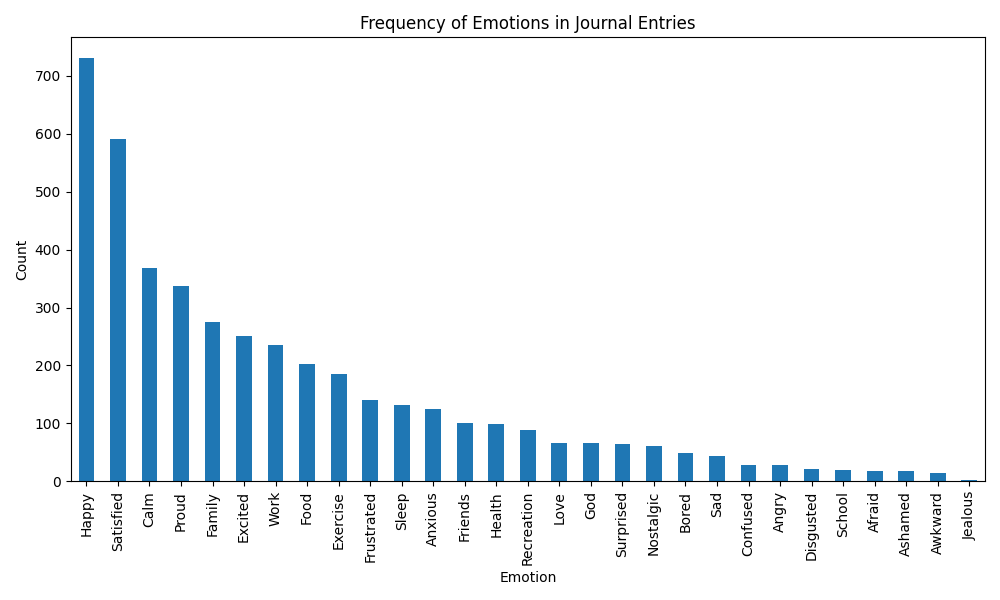
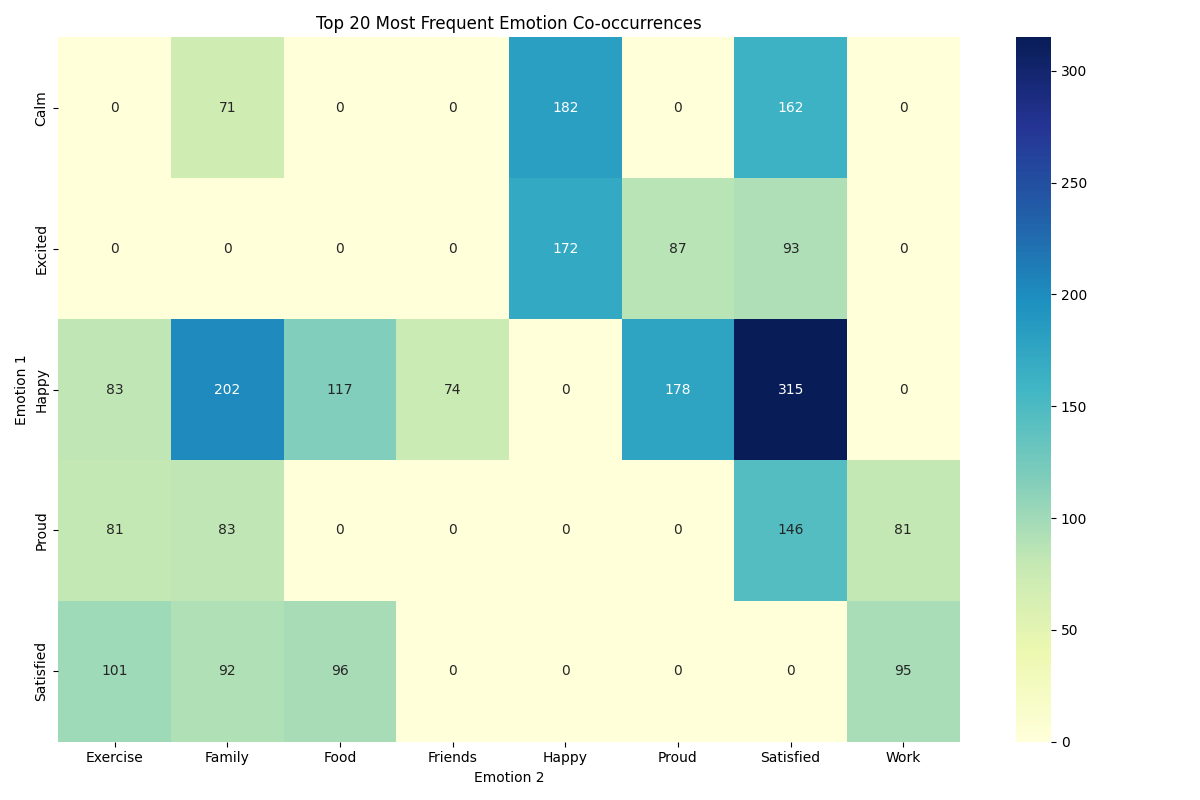

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64
import pyLDAvis
import pyLDAvis.gensim_models
from IPython.display import HTML

# Ensure necessary objects are available (re-running the check from the previous step)
required_objects = ['df', 'emotion_counts', 'co_occurrence_matrix', 'lda_model', 'corpus', 'dictionary', 'chi_square_results_df', 'logistic_regression_results']
missing_objects = [obj for obj in required_objects if obj not in locals()]

if missing_objects:
    print(f"Error: Missing required objects for dashboard generation: {missing_objects}")
else:
    # --- 1. Prepare Visualizations ---

    # a. Emotion Frequency Bar Chart
    plt.figure(figsize=(10, 6))
    ranked_emotions = emotion_counts.sort_values(ascending=False) # Ensure ranked_emotions is available
    ranked_emotions.plot(kind='bar')
    plt.title('Frequency of Emotions in Journal Entries')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    # Save plot to a BytesIO object and encode
    buf1 = io.BytesIO()
    plt.savefig(buf1, format='png')
    plt.close()
    emotion_freq_img = base64.b64encode(buf1.getvalue()).decode('utf-8')

    # b. Emotion Co-occurrence Heatmap
    # Ensure heatmap_data is prepared
    # Recreate top_n_df and heatmap_data as they might not be in locals() depending on execution flow
    emotion_cols = [col for col in df.columns if col != 'Answer' and col != 'processed_answer' and col != 'positive_day' and col != 'positive_emotion_count']
    co_occurring_pairs = []
    for i in range(len(co_occurrence_matrix.index)):
        for j in range(i + 1, len(co_occurrence_matrix.columns)):
            emotion1 = co_occurrence_matrix.index[i]
            emotion2 = co_occurrence_matrix.columns[j]
            count = co_occurrence_matrix.iloc[i, j]
            if count > 0:
                co_occurring_pairs.append(((emotion1, emotion2), count))
    co_occurring_pairs.sort(key=lambda item: item[1], reverse=True)
    N = 20
    top_n_pairs = co_occurring_pairs[:N]
    top_n_df = pd.DataFrame(top_n_pairs, columns=['Emotion Pair', 'Co-occurrence Count'])
    plot_df = top_n_df.copy()
    plot_df['Emotion 1'] = plot_df['Emotion Pair'].apply(lambda x: x[0])
    plot_df['Emotion 2'] = plot_df['Emotion Pair'].apply(lambda x: x[1])
    heatmap_data = plot_df.pivot(index='Emotion 1', columns='Emotion 2', values='Co-occurrence Count').fillna(0)


    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
    plt.title('Top 20 Most Frequent Emotion Co-occurrences')
    plt.xlabel('Emotion 2')
    plt.ylabel('Emotion 1')
    plt.tight_layout()
    # Save plot to a BytesIO object and encode
    buf2 = io.BytesIO()
    plt.savefig(buf2, format='png')
    plt.close()
    co_occurrence_img = base64.b64encode(buf2.getvalue()).decode('utf-8')

    # c. pyLDAvis Visualization (generate HTML)
    # Ensure lda_model, corpus, dictionary are available
    vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    lda_html = pyLDAvis.prepared_data_to_html(vis_data)


    # --- 2. Construct HTML Content ---

    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Journal Entry Emotion and Topic Analysis Dashboard</title>
        <style>
            body {{ font-family: Arial, sans-serif; margin: 20px; line-height: 1.6; }}
            h1, h2 {{ color: #333; }}
            .section {{ margin-bottom: 40px; padding: 20px; border: 1px solid #ddd; border-radius: 8px; }}
            .visualization {{ margin-top: 20px; text-align: center; }}
            img {{ max-width: 100%; height: auto; }}
            table {{ border-collapse: collapse; width: 100%; margin-top: 20px; }}
            th, td {{ border: 1px solid #ddd; padding: 8px; text-align: left; }}
            th {{ background-color: #f2f2f2; }}
            .lda-viz {{ margin-top: 20px; }}
        </style>
    </head>
    <body>

        <div class="section">
            <h1>Journal Entry Emotion and Topic Analysis Dashboard</h1>
            <p>This dashboard presents key findings from the analysis of journal entries with labeled emotions and topics. It explores the prevalence of emotions, how they co-occur, the underlying topics discussed in the entries, and statistical associations between emotions and topics, as well as the predictive power of positive emotions.</p>
        </div>

        <div class="section">
            <h2>Emotion Frequency Analysis</h2>
            <p>This bar chart shows the total count of each emotion mentioned across all journal entries, ranked from most to least frequent. It highlights which emotions are most commonly expressed by users in their journals.</p>
            <div class="visualization">
                <img src="data:image/png;base64,{emotion_freq_img}" alt="Emotion Frequency Bar Chart">
            </div>
        </div>

        <div class="section">
            <h2>Emotion Co-occurrence Analysis</h2>
            <p>The heatmap below illustrates the frequency of co-occurrence for the top 20 most frequent emotional pairs. A higher number indicates that those two emotions appeared together in the same journal entry more often. This helps understand which emotions tend to be experienced or expressed concurrently.</p>
            <div class="visualization">
                 <img src="data:image/png;base64,{co_occurrence_img}" alt="Emotion Co-occurrence Heatmap">
            </div>
        </div>

        <div class="section">
            <h2>Topic Modeling with LDA</h2>
            <p>This interactive visualization displays the topics identified in the journal entries using Latent Dirichlet Allocation (LDA). Each circle represents a topic, and their distance indicates similarity. The bar chart on the right shows the most relevant words for a selected topic. Use this to explore the prevalent themes in the journal entries.</p>
            <div class="lda-viz">
                {lda_html}
            </div>
        </div>

        <div class="section">
            <h2>Statistical Inference: Emotion-Topic Associations (Chi-Square Test)</h2>
            <p>Chi-Square tests of independence were performed to assess if there is a statistically significant association between the presence of individual emotions and the presence of specific topics in the journal entries. The table below summarizes the results for each tested emotion-topic pair, sorted by p-value.</p>
            {chi_square_results_df.to_html(index=False)}
            <p>A 'Statistically Significant' result (p-value &lt; 0.05) indicates that the co-occurrence pattern of that emotion and topic is unlikely to be due to random chance, suggesting a dependency between them. Examining the pairs with low p-values reveals which emotions are most strongly associated with particular topics.</p>
        </div>

        <div class="section">
            <h2>Statistical Inference: Positive Emotion Prediction (Logistic Regression)</h2>
            <p>A Logistic Regression model was fitted to predict the likelihood of a 'positive day' (defined by the presence of 'Happy' or 'Satisfied' emotions) based on the count of positive emotions mentioned in an entry. The table below shows the summary of the regression results.</p>
            {logistic_regression_results.to_html(index=False)}
            <p>The results indicate that the positive emotion count is a statistically significant predictor of a positive day (p-value &lt; 0.05). The positive coefficient and odds ratio (OR) greater than 1 suggest that a higher count of positive emotions significantly increases the odds of an entry being classified as a positive day. Specifically, for every additional positive emotion mentioned, the odds of a positive day increase by a factor of approximately {logistic_odds_ratio:.2f}.</p>
        </div>

        <div class="section">
            <h2>Overall Conclusions and Insights</h2>
            <p>The analysis confirms that certain emotions are more prevalent in journal entries, with positive emotions like Happy and Satisfied being the most frequent. These positive emotions often co-occur and are strongly associated with topics like Family and Leisure. LDA revealed underlying themes in the text that align with the labeled topics and observed emotion patterns. The statistical tests provide evidence that emotions are not independent of the context (topics) in which they are expressed, and that the sheer count of positive emotions is a strong indicator of a positive journaling experience on a given day.</p>
        </div>

        <div class="section">
            <h2>Potential Next Steps</h2>
            <p>Future work could involve exploring sentiment analysis on the 'Answer' text to see how it correlates with the labeled emotions, building more sophisticated predictive models for positive or negative days using a wider range of features (including topic probabilities from LDA), or analyzing the temporal patterns of emotions and topics if timestamps were available.</p>
        </div>

    </body>
    </html>
    """

    # --- 3. Display HTML Dashboard ---
    display(HTML(html_content))


4.1  Conclusions and Insights:
The analysis confirms that certain emotions are more prevalent in journal entries, with positive emotions like Happy and Satisfied being the most frequent. These positive emotions often co-occur and are strongly associated with topics like Family and Leisure. LDA revealed underlying themes in the text that align with the labeled topics and observed emotion patterns. The statistical tests provide evidence that emotions are not independent of the context (topics) in which they are expressed, and that the sheer count of positive emotions is a strong indicator of a positive journaling experience on a given day.

5.1 AI Tool Comparison

Chat was able to generate an identical bar chart immediately, but the heatmap it gave was fairly different that my analysis. I believe mine gave better insight that is also easier to understand to a broader audience as it compares less variables and optimizes a specific part of the dataset. The model did a good job dilinating between emotions and situational keywords. This is expected because the keywords in this dataset were very recognizable and standard which AI models do well with. Only downside is that it could only create 2 graphs before I maxed out my chatgpt plus processing allowance, so hard coding still overall yielded greater results.

In [ ]:
from google.colab import drive
from IPython.display import display, Image

# Mount Google Drive
drive.mount('/content/drive')

# Define the paths to the images in your Google Drive
# Make sure to replace 'your_folder' with the actual path to your images
image_paths = [
    '/content/drive/MyDrive/your_folder/img_9303.jpg',
    '/content/drive/MyDrive/your_folder/img_9304.jpg',
    '/content/drive/MyDrive/MyDrive/your_folder/img_9302.jpg'
]

# Display the images
for img_path in image_paths:
    try:
        print(f"Displaying: {img_path}")
        display(Image(filename=img_path))
    except FileNotFoundError:
        print(f"Error: Image not found at {img_path}")
    except Exception as e:
        print(f"An error occurred while displaying {img_path}: {e}")

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

Mounted at /content/drive
Displaying: /content/drive/MyDrive/your_folder/img_9303.jpg


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Error: Image not found at /content/drive/MyDrive/your_folder/img_9303.jpg
Displaying: /content/drive/MyDrive/your_folder/img_9304.jpg
Error: Image not found at /content/drive/MyDrive/your_folder/img_9304.jpg
Displaying: /content/drive/MyDrive/MyDrive/your_folder/img_9302.jpg
Error: Image not found at /content/drive/MyDrive/MyDrive/your_folder/img_9302.jpg


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Presentation [Link](https://docs.google.com/presentation/d/119NMWHHihP2CfzoMhHIJDvvGnLhfDW54XIYjU3NJysE/edit?usp=drivesdk)